# Initialize Settings

In [78]:
from numpy import NaN
import numpy as np
from random import randint
import pandas as pd  
import csv 
import seaborn as sns
### Apply the default default seaborn theme, scaling, and color palette
sns.set()
import matplotlib.pyplot as plt
import math 
from operator import itemgetter
import os
 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, accuracy_score 
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
#from tensorflow.keras.layers import Dense, Activation, Flatten

!pip install lazypredict

from lazypredict.Supervised import   LazyClassifier
 
import joblib 
import sys
sys.modules['sklearn.externals.joblib'] = joblib
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Set option to format printing of Float columns
pd.options.display.float_format = '{:.2f}'.format

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [3]:
# Mount Google Drive

from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount('/gdrive') 
%cd /gdrive/My\ Drive/MSDS\ 498\ Capstone/4.\ Analytics/4a.\ Data 

Mounted at /gdrive
/gdrive/My Drive/MSDS 498 Capstone/4. Analytics/4a. Data


# Import Data Files

In [4]:
'''

In modeling....

These variables will be excluded as Independent variables:

PID -- this is the unique ID
Target -- this is the Y variable


These variables will be one-hot encoded:
 
NUM_FLOORS_GRPD
R_BLDG_STYL_GRPD
R_ROOF_TYP_GRPD
R_EXT_FIN_GRPD
R_BDRMS_GRPD
R_FULL_BTH_GRPD
R_HALF_BTH_GRPD
R_BTH_STYLE
R_BTH_STYLE2
R_KITCH_STYLE
R_HEAT_TYP_GRPD
R_AC
R_FPLACE_GRPD
R_EXT_CND_GRPD
R_OVRALL_CND_GRPD
REMODELED_EVER_FLAG

All Other Variables will be treated as continuous.


'''

'\n\nIn modeling....\n\nThese variables will be excluded as Independent variables:\n\nPID -- this is the unique ID\nTarget -- this is the Y variable\n\n\nThese variables will be one-hot encoded:\n \nNUM_FLOORS_GRPD\nR_BLDG_STYL_GRPD\nR_ROOF_TYP_GRPD\nR_EXT_FIN_GRPD\nR_BDRMS_GRPD\nR_FULL_BTH_GRPD\nR_HALF_BTH_GRPD\nR_BTH_STYLE\nR_BTH_STYLE2\nR_KITCH_STYLE\nR_HEAT_TYP_GRPD\nR_AC\nR_FPLACE_GRPD\nR_EXT_CND_GRPD\nR_OVRALL_CND_GRPD\nREMODELED_EVER_FLAG\n\nAll Other Variables will be treated as continuous.\n\n\n'

In [5]:
# Import Modeling Set
df1 = pd.read_csv('pa_2019_classification_modeling_input.csv', low_memory=False)
df1.shape
df1.info(verbose=True, show_counts=True )
df1.head()

(19991, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 111 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  float64
 2    R_BTH_STYLE                                   19991 non-null  object 
 3    R_BTH_STYLE2                                  19991 non-null  object 
 4    R_KITCH_STYLE                                 19991 non-null  object 
 5    R_AC                                          19991 non-null  object 
 6    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 7    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  float64
 9    inc_pct_fam_married_couple_inc_75000_99999    19

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL_LOG
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,0.00,A,A,12.43,13.17,13.56,7.27,7.90,7.61,NaN
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,1.00,A,A,12.43,13.32,13.67,7.27,7.91,7.61,1.10
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,1.00,G,G,12.43,13.57,13.85,7.27,8.06,7.86,2.94
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,0.00,G,A,12.43,13.22,13.59,7.27,7.90,7.61,NaN
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,0.00,G,G,12.54,13.46,13.80,7.38,7.93,7.69,NaN


# Plug Missing AGE_REMODEL values with AGE_BUILT

(19991, 140)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PID          19991 non-null  int64  
 1   AGE_BUILT    19991 non-null  float64
 2   AGE_REMODEL  6859 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 468.7 KB


,PID,AGE_BUILT,AGE_REMODEL
0,1000019000,119.00,NaN
1,1000024000,119.00,3.00
2,1000027000,144.00,19.00
3,1000029000,119.00,NaN
4,1000093000,119.00,NaN
5,1000094000,119.00,57.00
6,1000095000,119.00,34.00
7,1000096000,119.00,16.00
8,1000099000,123.00,19.00
9,1000111000,119.00,NaN



# Missing AGE_BUILT before plug: 13132 



,PID,AGE_BUILT,AGE_REMODEL
0,1000019000,119.00,119.00
1,1000024000,119.00,3.00
2,1000027000,144.00,19.00
3,1000029000,119.00,119.00
4,1000093000,119.00,119.00
5,1000094000,119.00,57.00
6,1000095000,119.00,34.00
7,1000096000,119.00,16.00
8,1000099000,123.00,19.00
9,1000111000,119.00,119.00



# Missing AGE_BUILT after plug: 0


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AGE_REMODEL')

Text(0.5, 1.0, 'Log Transformed: AGE_REMODEL')

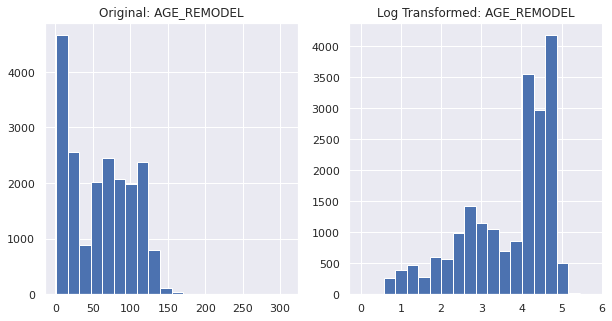

In [6]:
# Import the EDA Set
agedf = pd.read_csv('pa_2019_eda_output.csv', low_memory=False)
agedf.shape
agedf = agedf[["PID","AGE_BUILT","AGE_REMODEL"]]
agedf.info(verbose=True, show_counts=True )
agedf.head(10)
print('\n# Missing AGE_BUILT before plug:', agedf['AGE_REMODEL'].isna().sum(),'\n')

# Plug Missing "AGE_REMODEL" with "AGE_BUILT"
agedf["AGE_REMODEL"] = np.where(agedf['AGE_REMODEL'].isna(), agedf['AGE_BUILT'], agedf['AGE_REMODEL'])
agedf.head(10)
print('\n# Missing AGE_BUILT after plug:', agedf['AGE_REMODEL'].isna().sum() )

# Show Plots of Original Data Compared to Log Transformed Version
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AGE_REMODEL')
agedf['AGE_REMODEL'].hist(bins=20)
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AGE_REMODEL') 
np.log(agedf['AGE_REMODEL']).hist(bins=20)

# There is no value of tranforming AGE_REMODEL to LOG


### Add AGE_REMODEL to DF and Drop AGE_REMODEL_LOG

In [7]:
df1 = pd.merge(df1, agedf[['PID','AGE_REMODEL']], left_on='PID', right_on="PID", how='left') 
df1 = df1.drop('AGE_REMODEL_LOG', axis=1)
df1.shape 
df1.head()

(19991, 111)

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,0.00,A,A,12.43,13.17,13.56,7.27,7.90,7.61,119.00
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,1.00,A,A,12.43,13.32,13.67,7.27,7.91,7.61,3.00
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,1.00,G,G,12.43,13.57,13.85,7.27,8.06,7.86,19.00
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,0.00,G,A,12.43,13.22,13.59,7.27,7.90,7.61,119.00
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,0.00,G,G,12.54,13.46,13.80,7.38,7.93,7.69,119.00


In [8]:
colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df1.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df1.iloc[:,i].dtypes        # column type
  n_null = df1.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df1.iloc[:,i].unique()) # number unique
  n_rows = len(df1.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,R_TOTAL_RMS,float64,19991,19991,18,0
2,R_BTH_STYLE,object,19991,19991,4,0
3,R_BTH_STYLE2,object,19991,19991,5,0
4,R_KITCH_STYLE,object,19991,19991,4,0
5,R_AC,object,19991,19991,3,0
6,inc_cnt_fam_married_couple_total,int64,19991,19991,79,0
7,inc_pct_fam_married_couple_inc_35000_49999,float64,19991,19991,55,0
8,inc_pct_fam_married_couple_inc_50000_74999,float64,19991,19991,67,0
9,inc_pct_fam_married_couple_inc_75000_99999,float64,19991,19991,68,0


# Modify the Target Variable by Adding in 2018 Remodels

In [9]:
# Read in Property Assessment Files from 2021 and 2022
url2022= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/4b99718b-d064-471b-9b24-517ae5effecc/download/fy2022pa-4.csv'  
url2021= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv'

In [10]:
framelist=[[url2022,'2022'], [url2021,'2021']]
dflist=[]
for frame in framelist:
  df= pd.read_csv(frame[0], low_memory=False)
  df["filename"] = frame[1]
  df["PID"] = df["PID"].astype(str)

  dflist.append(df)


# isolate 2022 file
pa2022_df=dflist[0]
print(pa2022_df.shape)

# isolate 2021 file
pa2021_df=dflist[1]
print(pa2021_df.shape)


(178598, 65)
(177091, 64)


In [11]:
# Isolate the Remodel Year from the 2021 and 2022 Files
pa2022_df = pa2022_df[['PID','YR_REMODEL']]
pa2022_df.columns = ["PID","YR_REMODEL_2022PA"]
pa2022_df['PID'] = pa2022_df['PID'].astype(int)
print(pa2022_df.shape)
print(pa2022_df.head())

pa2021_df = pa2021_df[['PID','YR_REMODEL']]
pa2021_df.columns = ["PID","YR_REMODEL_2021PA"]
pa2021_df['PID'] = pa2021_df['PID'].astype(int)
print(pa2021_df.shape)
print(pa2021_df.head())

(178598, 2)
         PID  YR_REMODEL_2022PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00
(177091, 2)
         PID  YR_REMODEL_2021PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00


In [12]:
# Remove Duplicates
pa2022_df = pa2022_df.drop_duplicates(subset=['PID'])
pa2021_df = pa2021_df.drop_duplicates(subset=['PID'])

# Add the 2021 and 2022 Remodel Years to the List of PIDs
pids = pd.DataFrame(df1['PID'])

pids = pd.merge(pids, pa2021_df, left_on='PID', right_on="PID", how='left') 
pids = pd.merge(pids, pa2022_df, left_on='PID', right_on="PID", how='left') 
pids.shape
pids.info()
pids.head()

(19991, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                19991 non-null  int64  
 1   YR_REMODEL_2021PA  7275 non-null   float64
 2   YR_REMODEL_2022PA  7494 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 624.7 KB


,PID,YR_REMODEL_2021PA,YR_REMODEL_2022PA
0,1000019000,NaN,NaN
1,1000024000,2016.00,2016.00
2,1000027000,2000.00,2000.00
3,1000029000,NaN,NaN
4,1000093000,NaN,NaN


In [13]:
pids['Target'] = 0


# pids.loc[pids['YR_REMODEL_2021PA'] == 2018, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2020, 'Target'] = 1
# pids.loc[pids['YR_REMODEL_2022PA'] == 2018, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2020, 'Target'] = 1

pids['Target'].value_counts()

0    19442
1      549
Name: Target, dtype: int64

In [14]:
pids[pids['Target']==0].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()
print('\n\n================================================================')
pids[pids['Target']==1].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1904.00            1904.00            0           1
1919.00            1919.00            0           1
1930.00            1930.00            0           1
1935.00            1935.00            0           4
1940.00            1940.00            0           4
1945.00            1945.00            0           6
1947.00            1947.00            0           1
1949.00            1949.00            0           1
1950.00            1950.00            0          52
1951.00            1951.00            0           1
1952.00            1952.00            0           3
1953.00            1953.00            0           3
1955.00            1955.00            0           9
1956.00            1956.00            0           3
1957.00            1957.00            0           3
                   2009.00            0           1
1958.00            1958.00            0           5
1959.00            1959.00            0           3
1960.00            

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1954.00            2020.00            1           1
1970.00            2020.00            1           1
1975.00            2019.00            1           1
                   2020.00            1           1
1984.00            2020.00            1           1
1990.00            2020.00            1           1
1992.00            2019.00            1           1
                   2020.00            1           2
1993.00            2020.00            1           2
1994.00            2020.00            1           1
1995.00            2020.00            1           1
1996.00            2019.00            1           1
                   2020.00            1           2
1997.00            2019.00            1           1
                   2020.00            1           2
1998.00            2020.00            1           1
1999.00            2020.00            1           1
2000.00            2020.00            1           4
2001.00            

In [15]:
df2 = df1.copy()
df2 = df2.drop('Target', axis=1)
df2 = pd.merge(df2, pids[["PID","Target"]], left_on='PID', right_on="PID", how='left') 
df1.shape
print('\n\n')
print('Targets without 2018:')
df1['Target'].value_counts() 
print('\n\n')
df2.shape
print('\n\n')
print('Targets with 2018:')
df2['Target'].value_counts()
print('\n\n')
df2.head()

(19991, 111)




Targets without 2018:


0    19442
1      549
Name: Target, dtype: int64

(19991, 111)




Targets with 2018:


0    19442
1      549
Name: Target, dtype: int64

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL,Target
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,A,A,12.43,13.17,13.56,7.27,7.90,7.61,119.00,0
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,A,A,12.43,13.32,13.67,7.27,7.91,7.61,3.00,0
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,G,G,12.43,13.57,13.85,7.27,8.06,7.86,19.00,0
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,G,A,12.43,13.22,13.59,7.27,7.90,7.61,119.00,0
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,G,G,12.54,13.46,13.80,7.38,7.93,7.69,119.00,0


# One-Hot Encoding of Categorical Variables

In [16]:
catlist =[
'NUM_FLOORS_GRPD',
'R_BLDG_STYL_GRPD',
'R_ROOF_TYP_GRPD',
'R_EXT_FIN_GRPD',
'R_BDRMS_GRPD',
'R_FULL_BTH_GRPD',
'R_HALF_BTH_GRPD',
'R_BTH_STYLE',
'R_BTH_STYLE2',
'R_KITCH_STYLE',
'R_HEAT_TYP_GRPD',
'R_AC',
'R_FPLACE_GRPD',
'R_EXT_CND_GRPD',
'R_OVRALL_CND_GRPD',
'REMODELED_EVER_FLAG'
]

for i in catlist :
    thePrefix = "z_" + i
    y  = pd.get_dummies(df2[i], prefix=thePrefix, drop_first=True)   
    df2 = pd.concat([df2, y], axis=1)
    df2 = df2.drop([i], axis=1)

df2.shape
df2.head()
df2.info(verbose=True, show_counts=True )

(19991, 146)

,PID,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,...,z_R_AC_D,z_R_AC_N,z_R_FPLACE_GRPD_1.0,z_R_FPLACE_GRPD_2.0,z_R_FPLACE_GRPD_3.0,z_R_EXT_CND_GRPD_F_P_E,z_R_EXT_CND_GRPD_G,z_R_OVRALL_CND_GRPD_F_P_E,z_R_OVRALL_CND_GRPD_G,z_REMODELED_EVER_FLAG_1
0,1000019000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,0,0,0,0,0,0,0,0
1,1000024000,6.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,1,0,0,0,0,0,0,1
2,1000027000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,0,1,0,0,0,1,0,1,1
3,1000029000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,0,0,0,0,0,1,0,0,0
4,1000093000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,0,0,0,0,1,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 146 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  float64
 2    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 3    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 4    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  float64
 5    inc_pct_fam_married_couple_inc_75000_99999    19991 non-null  float64
 6    inc_pct_fam_married_couple_inc_100000_149999  19991 non-null  float64
 7    inc_pct_fam_married_couple_inc_150000_199999  19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_gt_200000      19991 non-null  float64
 9    inc_othr_fam_married_couple_inc_median        19

# Correlation Heat Map

In [17]:
# Create a correlation matrix on numeric variables
dfcont = df2.iloc[:, 1:95] #drop PID and dummy-coded variables
dfcont = dfcont.drop('Target', axis=1)
correlationDF = dfcont.corr()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
correlationDF

,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_SALE,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL
R_TOTAL_RMS,1.00,-0.05,-0.01,-0.10,-0.02,-0.05,-0.01,0.06,0.07,0.04,-0.00,-0.06,-0.07,-0.00,-0.09,-0.00,-0.08,0.10,0.06,0.17,-0.07,-0.06,-0.03,-0.05,-0.02,-0.08,-0.03,-0.06,-0.10,0.04,0.06,0.02,0.12,0.02,0.07,-0.07,-0.08,0.03,-0.09,0.05,0.03,-0.05,-0.11,-0.01,-0.10,0.03,-0.08,0.06,0.11,0.10,0.08,0.06,-0.04,-0.02,-0.01,-0.05,-0.08,-0.03,-0.06,-0.09,0.03,-0.01,-0.04,-0.02,0.07,-0.03,-0.07,-0.06,-0.13,-0.15,0.07,0.12,0.06,0.11,0.09,0.12,0.03,0.05,-0.01,0.06,0.08,0.13,0.15,-0.23,0.31,-0.01,0.34,0.45,0.45,0.20,0.69,0.72,0.02
inc_cnt_fam_married_couple_total,-0.05,1.00,-0.23,-0.25,-0.31,0.11,0.22,0.31,0.27,0.37,-0.29,0.03,0.08,-0.07,0.34,-0.07,-0.01,0.14,-0.10,-0.15,0.54,0.30,-0.04,0.06,0.12,-0.08,-0.00,-0.01,-0.11,-0.20,-0.36,-0.14,-0.06,-0.04,0.02,-0.01,0.36,0.14,0.26,0.05,0.23,0.50,0.02,-0.04,-0.09,-0.10,-0.10,-0.40,-0.30,0.11,0.10,0.20,0.24,0.21,0.20,0.18,0.52,0.45,0.53,0.17,-0.04,0.00,-0.20,0.08,0.12,-0.43,-0.37,-0.25,-0.30,-0.02,0.38,0.27,0.44,0.35,0.11,0.22,0.18,0.42,0.43,0.42,0.51,0.35,0.06,0.51,-0.04,-0.03,0.14,0.11,0.12,0.19,-0.00,-0.04,-0.05
inc_pct_fam_married_couple_inc_35000_49999,-0.01,-0.23,1.00,0.07,0.22,-0.14,-0.34,-0.38,-0.42,0.12,0.08,0.44,0.15,-0.15,-0.06,-0.23,0.00,-0.15,0.03,-0.16,0.04,-0.30,0.08,-0.18,-0.23,0.03,0.20,-0.03,0.18,-0.19,0.10,0.19,

In [18]:
fig, ax = plt.subplots(figsize=(150, 120))
sns.heatmap(correlationDF, vmax=1, square=True, annot=True, cmap='YlOrRd', linewidths=.25)   #cmap='bwr'
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_yticklabels(
ax.get_yticklabels(),
rotation=0,
horizontalalignment='right'
);
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=0,
horizontalalignment='center'
);

Output hidden; open in https://colab.research.google.com to view.

In [19]:
hicorr = [ 'inc_pct_fam_married_couple_inc_gt_200000'
, 'as_Ratio_Old-age_dependency_ratio'
, 'as_Pct_Age_18_years_and_over'
, 'as_Pct_Age_21_years_and_over'
, 'as_Pct_Age_62_years_and_over'
, 'as_Pct_Age_65_years_and_over'
, 'as_Pct_Age_75_years_and_over'
, 'edu_Pct_Age_25_plus_bachelors'
, 'edu_Pct_Age_25_plus_grad_professional'
, 'edu_Pct_Age_25_plus_high_school_plus'
, 'edu_Pct_Age_25to34_high_school_plus'
, 'edu_Pct_Age_25to34_bachelors_plus'
, 'edu_Pct_Age_35to44_high_school_plus'
, 'edu_Pct_Age_35to44_bachelors_plus'
, 'edu_Pct_Age_45to64_high_school_plus'
, 'edu_Pct_Age_45to64_bachelors_plus'
, 'edu_Pct_Age_65_plus_high_school_plus'
, 'edu_Pct_Age_65_plus_bachelors_plus'
, 'AV_LAND_LOG'
, 'AV_TOTAL_LOG'
, 'GROSS_AREA_LOG'
, 'as_Ratio_Age_dependency_ratio'
, 'as_Ratio_Child_dependency_ratio'
, 'as_Pct_Age_5_to_14_years'
, 'as_Pct_Age_15_to_17_years'
, 'as_Pct_Age_Under_18_years'
, 'as_Pct_Age_18_to_24_years'
, 'as_Pct_Age_15_to_44_years'
, 'as_Pct_Age_16_years_and_over'
, 'as_Pct_Age_60_years_and_over'
, 'as_Cnt_Male_Total_Population'
, 'as_Othr_Male_Age_Median_age_(years)'
, 'as_Cnt_Female_Total_Population'
, 'as_Othr_Female_Age_Median_age_(years)'
, 'edu_Pct_Age_25_plus_some_high_school'
, 'edu_Pct_Age_25_plus_high_school'
, 'edu_Pct_Age_25_plus_some_college'

]

# Create a correlation matrix on numeric variables 
dfcont = dfcont.drop(hicorr, axis=1)
correlationDF = dfcont.corr()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
correlationDF

,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_SALE,AV_BLDG_LOG,LAND_SF_LOG,LIVING_AREA_LOG,AGE_REMODEL
R_TOTAL_RMS,1.00,-0.05,-0.01,-0.10,-0.02,-0.05,-0.01,0.07,0.04,-0.00,-0.06,-0.07,-0.00,-0.09,-0.00,-0.08,0.10,0.06,0.17,-0.07,-0.06,-0.03,-0.03,-0.06,-0.10,0.04,0.06,0.02,0.12,0.02,0.07,-0.07,-0.08,0.03,-0.09,0.05,0.03,-0.05,-0.11,-0.01,0.03,-0.01,-0.04,-0.02,0.07,-0.03,-0.15,0.11,0.15,-0.23,0.31,-0.01,0.45,0.20,0.72,0.02
inc_cnt_fam_married_couple_total,-0.05,1.00,-0.23,-0.25,-0.31,0.11,0.22,0.27,0.37,-0.29,0.03,0.08,-0.07,0.34,-0.07,-0.01,0.14,-0.10,-0.15,0.54,0.30,-0.04,-0.00,-0.01,-0.11,-0.20,-0.36,-0.14,-0.06,-0.04,0.02,-0.01,0.36,0.14,0.26,0.05,0.23,0.50,0.02,-0.04,-0.04,0.00,-0.20,0.08,0.12,-0.43,-0.02,0.35,0.06,0.51,-0.04,-0.03,0.11,0.19,-0.04,-0.05
inc_pct_fam_married_couple_inc_35000_49999,-0.01,-0.23,1.00,0.07,0.22,-0.14,-0.34,-0.42,0.12,0.08,0.44,0.15,-0.15,-0.06,-0.23,0.00,-0.15,0.03,-0.16,0.04,-0.30,0.08,0.20,-0.03,0.18,-0.19,0.10,0.19,0.30,0.11,-0.00,-0.18,0.00,-0.19,-0.16,-0.34,-0.13,-0.14,-0.11,-0.14,0.00,0.12,-0.07,-0.16,0.10,0.33,-0.03,-0.29,-0.08,-0.24,0.01,0.01,-0.18,-0.19,-0.01,0.04
inc_pct_fam_married_couple_inc_50000_74999,-0.10,-0.25,0.07,1.00,0.15,-0.27,-0.06,-0.60,-0.05,0.28,0.01,0.52,-0.08,-0.14,0.08,0.13,-0.32,-0.25,-0.29,0.18,-0.26,-0.09,0.05,0.22,0.24,0.02,0.21,0.12,-0.18,0.20,-0.24,0.07,-0.27,-0.01,0.07,-0.03,-0.21,-0.28,-0.10,-0.16,-0.25,0.10,0.13,-0.08,-0.14,0.40,0.38,-0.43,-0.11,0.11,-0.12,0.02,-0.33,-0.07,-0.15,0.02
inc_pct_fam_married_couple_inc_75000_99999,-0.02,-0.31,0.22,0.15,1.00,0.04,-0.26,-0.55,-0.18,0.23,0.11,0.14,0.16,-0.04,-0.23,0.06,-0.11,-0.25,-0.16,0.07,-0.43,0.04,0.25,0.11,0.05,0.12,0.12,0.19,0.12,0.23,0.07,0.10,-0.10,-0.19,-0.39,-0.16,-0.39,-0.20,-0.13,-0.25,-0.12,0.33,-0.05,-0.05,-0.18,0.34,0.18,-0.50,-0.14,-0.07,-0.01,0.04,-0.34,-0.11,-0.07,0.07
inc_pct_fam_married_couple_inc_100000_149999,-0.05,0.11,-0.14,-0.27,0.04,1.00,-0.11,-0.15,0.07,0.06,-0.05,-0.12,0.02,0.10,-0.08,0.21,0.08,-0.14,-0.26,0.16,-0.20,0.29,0.06,-0.15,-0.05,0.06,-0.06,0.27,-0.07,0.18,0.06,0.21,0.10,0.04,-0.09,-0.33,-0.33,-0.05,0.04,-0.18,0.16,0.13,0.03,-0.13,-0.01,-0.10,0.02,-0.14,-0.07,0.13,0.01,0.02,-0.11,-0.05,-0.08,0.03
inc_pct_fam_married_couple_inc_150000_199999,-0.01,0.22,-0.34,-0.06,-0.26,-0.11,1.00,0.32,-0.05,-0.13,-0.23,-0.22,-0.09,0.07,0.00,0.04,0.31,-0.00,0.15,-0.00,0.10,-0.01,-0.28,0.03,-0.17,-0.07,0.09,-0.16,0.11,0.05,0.01,0.27,-0.10,0.23,0.05,0.11,-0.07,0.04,-0.04,0.01,0.10,-0.26,-0.05,0.29,0.01,-0.23,-0.06,0.34,0.06,0.20,0.05,-0.03,0.14

In [20]:
fig, ax = plt.subplots(figsize=(150, 120))
sns.heatmap(correlationDF, vmax=1, square=True, annot=True, cmap='YlOrRd', linewidths=.25)   #cmap='bwr'
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_yticklabels(
ax.get_yticklabels(),
rotation=0,
horizontalalignment='right'
);
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=0,
horizontalalignment='center'
);

Output hidden; open in https://colab.research.google.com to view.

In [21]:
# Output the Modeling Frame Contents After Dropping Columns

colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df2.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df2.iloc[:,i].dtypes        # column type
  n_null = df2.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df2.iloc[:,i].unique()) # number unique
  n_rows = len(df2.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,R_TOTAL_RMS,float64,19991,19991,18,0
2,inc_cnt_fam_married_couple_total,int64,19991,19991,79,0
3,inc_pct_fam_married_couple_inc_35000_49999,float64,19991,19991,55,0
4,inc_pct_fam_married_couple_inc_50000_74999,float64,19991,19991,67,0
5,inc_pct_fam_married_couple_inc_75000_99999,float64,19991,19991,68,0
6,inc_pct_fam_married_couple_inc_100000_149999,float64,19991,19991,75,0
7,inc_pct_fam_married_couple_inc_150000_199999,float64,19991,19991,69,0
8,inc_pct_fam_married_couple_inc_gt_200000,float64,19991,19991,77,0
9,inc_othr_fam_married_couple_inc_median,float64,19991,19991,78,0


# OVER AND UNDER SAMPLING

### Split into Train and Test -- PRE-Sampling

In [22]:
df3 = df2.copy()
df3 = df3.drop(hicorr, axis=1)  # Drop highly correlated features
 
# Split into test and train data frames
np.random.seed(789)
train, test = train_test_split(df3, train_size=0.8, test_size=0.2, random_state=1)

print("PreSplit =", df3.shape)
print("train =", train.shape)
print("test =", test.shape)


PreSplit = (19991, 109)
train = (15992, 109)
test = (3999, 109)


In [23]:
# Split the Targets from the NonTargets in the Train set
targets = pd.DataFrame(train[train['Target']==1])
nontargets = pd.DataFrame(train[train['Target']==0])

print("train =", train.shape)
print("targets:",targets.shape )
print("nontargets:",nontargets.shape )

train = (15992, 109)
targets: (432, 109)
nontargets: (15560, 109)


In [24]:
# Create a Dataframe with 2000 Randomly Selected Targets -- these will be added to modeling frame as OVER SAMPLING

 
cnt=0
for k in range(0,2500):
  if cnt == 0:
    np.random.seed(789)
    smplrecs = targets.sample() 
    cnt = 1
  else:
    np.random.seed(789)
    smplrec = targets.sample() 
    smplrecs = smplrecs.append(smplrec)
     
smplrecs.shape

(2500, 109)

In [25]:
# Randomly Select 5000 Rows from the NON-Target population to remove


np.random.seed(789)
undersamplist = [randint(0, nontargets.shape[0]-1) for p in range(0, 5000 )]
print('# Gross Sampled:',len(undersamplist) )

undersamplist = set(undersamplist) 
print('# Net Sampled:',len(undersamplist) )

# Get list oF PIDs
piddroplist = []
for k in undersamplist:
  smplrec = nontargets.iloc[k,0] 
  piddroplist.append(smplrec) 

print('# Uniqued PIDs:', len(piddroplist) )

# Gross Sampled: 5000
# Net Sampled: 4296
# Uniqued PIDs: 4296


In [26]:
# Append the Oversampled set to the Original Targets
targets2 = targets.copy()
targets2 = targets2.append(smplrecs)

print("targets:",targets.shape )
print("rows to add:",smplrecs.shape )
print("targets2:",targets2.shape )


# Remove the Randomly Selected Undersampled records from the Original Non Targets
nontargets2 = nontargets[~nontargets.PID.isin(piddroplist)]

print("nontargets:",nontargets.shape )
print('PIDs to Drop:', len(piddroplist) )
print("nontargets2:",nontargets2.shape )


targets: (432, 109)
rows to add: (2500, 109)
targets2: (2932, 109)
nontargets: (15560, 109)
PIDs to Drop: 4296
nontargets2: (11264, 109)


In [27]:
# Rebuid the Train Set
train2 = targets2.copy()
train2 = train2.append(nontargets2)

print("train =", train.shape)
print("targets:",targets.shape )
print("nontargets:",nontargets.shape )
print("targets2:",targets2.shape )
print("nontargets2:",nontargets2.shape )
print("train2 =", train2.shape)
print(train['Target'].value_counts())
print(train2['Target'].value_counts())

train = (15992, 109)
targets: (432, 109)
nontargets: (15560, 109)
targets2: (2932, 109)
nontargets2: (11264, 109)
train2 = (14196, 109)
0    15560
1      432
Name: Target, dtype: int64
0    11264
1     2932
Name: Target, dtype: int64


### Separate the Independent X variables from the Target Y Variable

In [28]:
X_train = train.copy()
# X_train = train2.copy()
X_train_ids = X_train['PID']
Y_train = pd.DataFrame(X_train['Target'])
X_train = X_train.drop(['PID','Target'], axis=1) 

X_test = test.copy()
X_test_ids = X_test['PID']
Y_test = pd.DataFrame(X_test['Target'])
X_test = X_test.drop(['PID','Target'], axis=1) 


print('Train Targets:',Y_train.sum() )
print('Test Targets:',Y_test.sum() )



Train Targets: Target    432
dtype: int64
Test Targets: Target    117
dtype: int64


In [29]:
# Create "weights" dictionary for use in "class_weights" in some model functions

# counts = np.bincount(Y_train['Target'])  # ratio based on Train set
counts = np.bincount(df3['Target'] )       # ratio based on full dataframe
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(df3['Target'])
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
print('weight for 0:', weight_for_0 )
print('weight for 1:', weight_for_1 )

weights = {0: weight_for_0, 1: weight_for_1}
print('weights:', weights)


Number of positive samples in training data: 549 (2.75% of total)
weight for 0: 5.143503754757741e-05
weight for 1: 0.0018214936247723133
weights: {0: 5.143503754757741e-05, 1: 0.0018214936247723133}


In [30]:
# Use the Over- Under- Sampled version for Gradient Boosting

Z_train = train2.copy()
Z_train_ids = Z_train['PID']
ZY_train = pd.DataFrame(Z_train['Target'])
Z_train = Z_train.drop(['PID','Target'], axis=1) 

Z_test = test.copy()
Z_test_ids = Z_test['PID']
ZY_test = pd.DataFrame(Z_test['Target'])
Z_test = Z_test.drop(['PID','Target'], axis=1) 

print('Train Shape:',Z_train.shape)
print('Train Targets:',ZY_train.sum() )
print('Test Shape:',Z_test.shape)
print('Test Targets:',ZY_test.sum() )


Train Shape: (14196, 107)
Train Targets: Target    2932
dtype: int64
Test Shape: (3999, 107)
Test Targets: Target    117
dtype: int64


# Define Functions for Assessing Model Performance

In [31]:
# CLASSIFICATION: Create functions to calculate and display classifcation accuracy and to generate ROC curve 

def getCoefLogit(MODEL, TRAIN_DATA) :
    # varNames = list(TRAIN_DATA.columns.values)
    if type(TRAIN_DATA) ==  np.ndarray:
      varNames = list(X_train.columns.values)
    else:
      varNames = list(TRAIN_DATA.columns.values)
      
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nCLASSIFICATION MODEL")
    print("------------------------------------------------")
    print("Total Variables: ", len( coef_dict))
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )


def getProbAccuracyScores(NAME, MODEL, X, Y) :
    pred = MODEL.predict(X)
    probs = MODEL.predict_proba(X)
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_Accuracy(TITLE, LIST) :
    print(TITLE)
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print(NAME, " = ", ACC)


def print_ROC_Curve(TITLE, LIST) :
    fig = plt.figure(figsize=(6,4), facecolor="w")
    plt.title(TITLE)
    k = 0
    for theResults in LIST :
        k=k+1  
        if k==1:
          lcolor = '#AF0026'
        else:
          lcolor = '#FEA747'

        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc          
        plt.plot(fpr, tpr, label = theLabel , color=lcolor, linewidth=3 )
    plt.legend(loc = 'lower right', facecolor='white', framealpha=0) 
    plt.plot([0, 1], [0, 1],'r--', color='grey', linewidth=2)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    ax = plt.axes()
    ax.set_facecolor("white")
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    # ax.spines['top'].set_color('black')
    # ax.spines['right'].set_color('black')
    plt.show() 

# Create function to select most important variables to use in decision tree model to reduce size (to take a large data set down to something small) 

def getTreeVars(TREE, varNames) :
    tree_ = TREE.tree_
    varName = [varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList :
        parameter_list.append(varNames[i])
    return parameter_list


# Create function to select most important variables to use in random forest and gradient boosted models to reduce size (to take a large data set down to something small)  

def getEnsembleTreeVars(ENSTREE, varNames) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average(ENSTREE.feature_importances_) :
            v = int(imp_val / np.max(ENSTREE.feature_importances_) * 100)
            theList.append((varNames[i], v))
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

# LOGISTIC REGRESSION

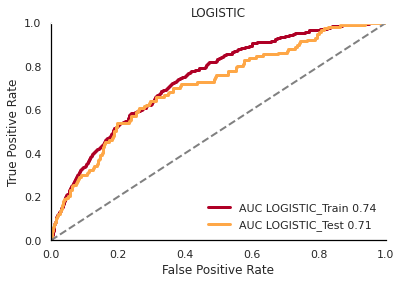

LOGISTIC CLASSIFICATION ACCURACY
------------------------------------------------
LOGISTIC_Train  =  0.6873436718359179
LOGISTIC_Test  =  0.6864216054013503


LOGISTIC AUC SCORE
------------------------------------------------
 Train:  0.7438712451204419 
 Test:  0.7107425461366729

CLASSIFICATION MODEL
------------------------------------------------
Total Variables:  108
INTERCEPT  =  3.1644800554359516
R_TOTAL_RMS  =  0.016341665471758703
inc_cnt_fam_married_couple_total  =  -0.0011579836883640255
inc_pct_fam_married_couple_inc_35000_49999  =  -0.01894656332962295
inc_pct_fam_married_couple_inc_50000_74999  =  -0.02069970763914596
inc_pct_fam_married_couple_inc_75000_99999  =  -0.024187980114589985
inc_pct_fam_married_couple_inc_100000_149999  =  0.0014633105369262138
inc_pct_fam_married_couple_inc_150000_199999  =  -0.024983840901347452
inc_othr_fam_married_couple_inc_median  =  -5.065008251427304e-06
inc_cnt_hh_non_fam_total  =  0.000530829095317325
inc_pct_hh_non_fam_inc_lt_10000

In [32]:
WHO = "LOGISTIC"
 
CLM = LogisticRegression(solver='newton-cg', max_iter=1000, multi_class="auto", random_state=1 ,  class_weight = weights)
CLM = CLM.fit( X_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores( WHO + "_Test", CLM, X_test, Y_test['Target'])

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
REG_STEP_CLM_COEF = getCoefLogit(CLM, X_train) 

REG_STEP_CLM = TEST_CLM.copy() 

### Get Performance Statistics from TRAIN

In [33]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(X_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[10708  4852]
 [  148   284]]


ACCURACY: 0.6873436718359179
F1-SCORE: 0.10201149425287356
PRECISION: 0.05529595015576324
RECALL: 0.6574074074074074
AUC 0.7438712451204419
# PREDICTED TARGETS: 5136


### Get Performance Statistics from TEST

In [34]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(X_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[2670 1212]
 [  42   75]]


ACCURACY: 0.6864216054013503
F1-SCORE: 0.10683760683760683
PRECISION: 0.05827505827505827
RECALL: 0.6410256410256411
AUC 0.7107425461366729
# PREDICTED TARGETS: 1287


# DECISION TREE 

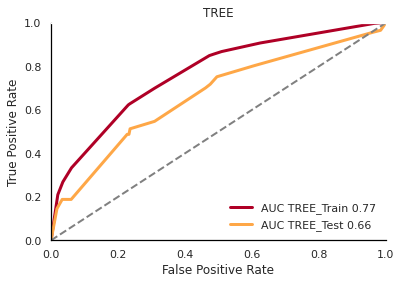

TREE CLASSIFICATION ACCURACY
------------------------------------------------
TREE_Train  =  0.7615057528764382
TREE_Test  =  0.7566891722930733



TREE AUC SCORE
------------------------------------------------
 Train:  0.766112807055127 
 Test:  0.6641952557717627


TREE MOST IMPORTANT VARIABLES
------------------------------------------------
z_R_ROOF_TYP_GRPD_G
as_Pct_Age_80_to_84_years
as_Pct_Female_Age_21_years_and_over
inc_pct_hh_non_fam_inc_75000_99999
sale_price
DISTANCE
AGE_BUILT
AGE_SALE
edu_Pct_Age_25_plus_bachelors_plus
as_Pct_Age_Under_5_years
as_Pct_Age_10_to_14_years
as_Pct_Age_15_to_19_years


In [35]:
WHO = "TREE"

CLM = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 4,\
                                        min_samples_split = 2, splitter ='best', random_state = 1,  class_weight = weights)
CLM = CLM.fit(X_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", CLM, X_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores(WHO + "_Test", CLM, X_test, Y_test['Target'])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print('\n\n')
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

# feature_cols = list(X.columns.values)
feature_cols = list(X_train.columns.values)
tree.export_graphviz(CLM,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols,  impurity=False, class_names=["Good","Bad"])

vars_tree_flag = getTreeVars(CLM, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_tree_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [36]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(X_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[11907  3653]
 [  161   271]]


ACCURACY: 0.7615057528764382
F1-SCORE: 0.12442607897153353
PRECISION: 0.06906218144750255
RECALL: 0.6273148148148148
AUC 0.766112807055127
# PREDICTED TARGETS: 3924


### Get Performance Statistics from TEST

In [37]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(X_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[2966  916]
 [  57   60]]


ACCURACY: 0.7566891722930733
F1-SCORE: 0.10978956999085085
PRECISION: 0.06147540983606557
RECALL: 0.5128205128205128
AUC 0.6641952557717627
# PREDICTED TARGETS: 976


# RANDOM FOREST

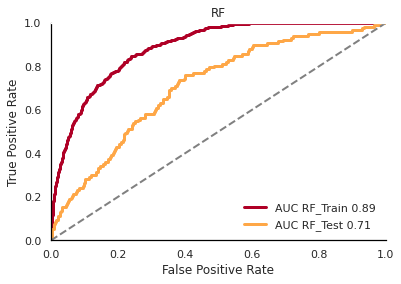

RF CLASSIFICATION ACCURACY
------------------------------------------------
RF_Train  =  0.8292271135567784
RF_Test  =  0.8179544886221556


RF AUC SCORE
------------------------------------------------
 Train:  0.8864437541654766 
 Test:  0.7102845920465704


RF MOST IMPORTANT VARIABLES
------------------------------------------------
('AGE_SALE', 100)
('sale_price', 78)
('DISTANCE', 34)
('AV_BLDG_LOG', 20)
('AGE_BUILT', 20)
('LIVING_AREA_LOG', 19)
('AGE_REMODEL', 18)
('LAND_SF_LOG', 17)
('edu_Pct_Age_25_plus_associates', 15)
('edu_Pct_Age_25_plus_bachelors_plus', 15)
('inc_pct_fam_married_couple_inc_150000_199999', 10)
('inc_pct_hh_non_fam_inc_100000_149999', 10)
('inc_pct_hh_non_fam_inc_75000_99999', 9)
('R_TOTAL_RMS', 9)
('as_Pct_Age_30_to_34_years', 9)
('inc_pct_fam_married_couple_inc_50000_74999', 8)
('inc_pct_hh_non_fam_inc_150000_199999', 8)
('inc_pct_hh_non_fam_inc_lt_10000', 7)
('edu_Pct_Age_25_plus_lt_9th', 6)


In [38]:

WHO = "RF"

CLM = RandomForestClassifier(max_depth = 7, max_leaf_nodes = 50, n_estimators = 500, random_state=1 , class_weight = weights )
CLM = CLM.fit(X_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", CLM, X_train, Y_train[ 'Target'])
TEST_CLM = getProbAccuracyScores(WHO + "_Test", CLM, X_test, Y_test['Target'])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

feature_cols = list(X_train.columns.values)

vars_RF_flag = getEnsembleTreeVars(CLM, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_RF_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [39]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(X_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[12939  2621]
 [  110   322]]


ACCURACY: 0.8292271135567784
F1-SCORE: 0.1908148148148148
PRECISION: 0.10941216445803602
RECALL: 0.7453703703703703
AUC 0.8864437541654766
# PREDICTED TARGETS: 2943


### Get Performance Statistics from TEST

In [40]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(X_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3229  653]
 [  75   42]]


ACCURACY: 0.8179544886221556
F1-SCORE: 0.10344827586206896
PRECISION: 0.060431654676258995
RECALL: 0.358974358974359
AUC 0.7102845920465704
# PREDICTED TARGETS: 695


# GRADIENT BOOSTING

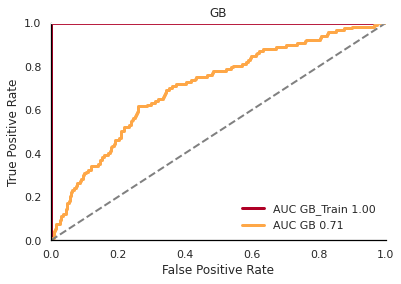

GB CLASSIFICATION ACCURACY
------------------------------------------------
GB_Train  =  0.9999374687343672
GB  =  0.9592398099524881


GB MOST IMPORTANT VARIABLES
------------------------------------------------
('DISTANCE', 100)
('AV_BLDG_LOG', 85)
('sale_price', 80)
('LAND_SF_LOG', 78)
('LIVING_AREA_LOG', 61)
('AGE_SALE', 51)
('AGE_REMODEL', 49)
('AGE_BUILT', 27)
('R_TOTAL_RMS', 23)
('edu_Pct_Age_25_plus_lt_9th', 11)
('z_R_BTH_STYLE2_Null', 11)
('inc_pct_hh_non_fam_inc_50000_74999', 10)
('as_Pct_Age_30_to_34_years', 10)
('edu_Pct_Age_18to24_high_school', 9)
('inc_pct_hh_non_fam_inc_25000_34999', 9)


In [41]:
WHO = "GB"

CLM = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 6, max_leaf_nodes = 20,\
                                     n_estimators = 200, random_state = 1)
CLM = CLM.fit(X_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", CLM, X_train, Y_train[ 'Target'])
TEST_CLM = getProbAccuracyScores(WHO, CLM, X_test, Y_test[ 'Target' ] )

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])

feature_cols = list(X_train.columns.values)

vars_GB_flag = getEnsembleTreeVars(CLM, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_GB_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [42]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(X_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[15560     0]
 [    1   431]]


ACCURACY: 0.9999374687343672
F1-SCORE: 0.9988412514484357
PRECISION: 1.0
RECALL: 0.9976851851851852
AUC 1.0
# PREDICTED TARGETS: 431


### Get Performance Statistics from TEST

In [43]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(X_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3830   52]
 [ 111    6]]


ACCURACY: 0.9592398099524881
F1-SCORE: 0.06857142857142857
PRECISION: 0.10344827586206896
RECALL: 0.05128205128205128
AUC 0.7070546946899343
# PREDICTED TARGETS: 58


# GRID SEARCH

In [44]:
# These columns 'popped' most often in TREE, GB, and RF

topvars = [
 'AGE_BUILT'
,'sale_price'
,'AGE_SALE'
,'DISTANCE'
,'AV_BLDG_LOG'
,'LAND_SF_LOG'
,'LIVING_AREA_LOG'
,'AGE_REMODEL'
,'R_TOTAL_RMS'
# ,'as_Pct_Age_30_to_34_years'
,'edu_Pct_Age_25_plus_bachelors_plus'
# ,'inc_pct_hh_non_fam_inc_75000_99999'
# ,'edu_Pct_Age_25_plus_lt_9th'
]



U_train = X_train.copy() 
U_test  = X_test.copy() 
U_train = U_train[topvars]
U_test  = U_test[topvars]
U_train.shape 
U_test.shape  


(15992, 10)

(3999, 10)

## Decision Tree - Hyperparameter Tuning

In [ ]:
# Set the Baseline Model


fm01_Tree = tree.DecisionTreeClassifier(random_state=1 ,  class_weight = weights )
fm01_Tree = fm01_Tree.fit(X_train, Y_train['Target'])

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("DECISION TREE - CLASSIFICATION\n")
print("Probability of Default:")
print("Accuracy Train:", metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

DECISION TREE - CLASSIFICATION

Probability of Default:
Accuracy Train: 1.0
Accuracy Test: 0.9444861215303826


In [ ]:
# Tune hyperparameters by passing the different parameter values 

grid_param = {'criterion': ['gini', 'entropy'], 'max_depth' : range(2,8,1),'min_samples_leaf' : range(1,10,1), \
              'min_samples_split': range(2,10,1), 'splitter' : ['best', 'random'], 'random_state' : [1]}
print(grid_param)

{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 8), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random'], 'random_state': [1]}


In [ ]:
# Run grid search  
# 12 minutes

grid_search = GridSearchCV(estimator=fm01_Tree, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(X_train, Y_train['Target'])

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 5.143503754757741e-05,
                                                            1: 0.0018214936247723133},
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10), 'random_state': [1],
                         'splitter': ['best', 'random']})

In [ ]:
# Display grid search best parameters to use in model refit 

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'random'}


In [ ]:
# AFTER HYPERPARAMETER TUNING: Fit the model  

fm01_Tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 1,\
                                        min_samples_split = 2, splitter ='random', random_state = 1 ,  class_weight = weights)
fm01_Tree = fm01_Tree.fit(X_train, Y_train['Target'])

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("DECISION TREE - CLASSIFICATION\n") 
print("Accuracy Train:", metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

DECISION TREE - CLASSIFICATION

Accuracy Train: 0.828664332166083
Accuracy Test: 0.824706176544136


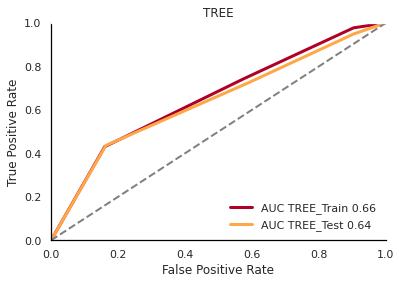

TREE CLASSIFICATION ACCURACY
------------------------------------------------
TREE_Train  =  0.828664332166083
TREE_Test  =  0.824706176544136



TREE AUC SCORE
------------------------------------------------
 Train:  0.6556369311149196 
 Test:  0.639511970655711


TREE MOST IMPORTANT VARIABLES
------------------------------------------------
sale_price
DISTANCE
AGE_SALE


In [ ]:
WHO = "TREE"

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", fm01_Tree, X_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores(WHO + "_Test", fm01_Tree, X_test, Y_test['Target'])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print('\n\n')
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
feature_cols = list(X_train.columns.values)
tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols,  impurity=False, class_names=["Good","Bad"])

vars_tree_flag = getTreeVars(fm01_Tree, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_tree_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = fm01_Tree.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = fm01_Tree.predict_proba(X_train)
 
# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[13066  2494]
 [  246   186]]


ACCURACY: 0.828664332166083
F1-SCORE: 0.11953727506426735
PRECISION: 0.06940298507462686
RECALL: 0.4305555555555556
AUC 0.6556369311149196
# PREDICTED TARGETS: 2680


### Get Performance Statistics from TEST

In [ ]:
 # Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = fm01_Tree.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = fm01_Tree.predict_proba(X_test)
 
# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3247  635]
 [  66   51]]


ACCURACY: 0.824706176544136
F1-SCORE: 0.12702366127023662
PRECISION: 0.07434402332361516
RECALL: 0.4358974358974359
AUC 0.639511970655711
# PREDICTED TARGETS: 686


## Decision Tree - Hyperparameter Tuning (Select Variables)

In [ ]:
# Set the Baseline Model

fm01_Tree = tree.DecisionTreeClassifier(random_state=1 ,  class_weight = weights )
fm01_Tree = fm01_Tree.fit(U_train, Y_train['Target'])

Y_Pred_train = fm01_Tree.predict(U_train)
Y_Pred_test = fm01_Tree.predict(U_test)

print("DECISION TREE - CLASSIFICATION\n")
print("Probability of Default:")
print("Accuracy Train:", metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

DECISION TREE - CLASSIFICATION

Probability of Default:
Accuracy Train: 1.0
Accuracy Test: 0.953988497124281


In [ ]:
# Tune hyperparameters by passing the different parameter values 

grid_param = {'criterion': ['gini', 'entropy'], 'max_depth' : range(2,8,1),'min_samples_leaf' : range(1,10,1), \
              'min_samples_split': range(2,10,1), 'splitter' : ['best', 'random'], 'random_state' : [1]}
print(grid_param)

{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 8), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random'], 'random_state': [1]}


In [ ]:
# Run grid search  
# 5 minutes

grid_search = GridSearchCV(estimator=fm01_Tree, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(U_train, Y_train['Target'])

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 5.143503754757741e-05,
                                                            1: 0.0018214936247723133},
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10), 'random_state': [1],
                         'splitter': ['best', 'random']})

In [ ]:
# Display grid search best parameters to use in model refit 

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'random'}


In [ ]:
# AFTER HYPERPARAMETER TUNING: Fit the model  


fm01_Tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1,\
                                        min_samples_split = 2, splitter ='random', random_state = 1,  class_weight = weights )
fm01_Tree = fm01_Tree.fit(U_train, Y_train['Target'])

Y_Pred_train = fm01_Tree.predict(U_train)
Y_Pred_test = fm01_Tree.predict(U_test)

print("DECISION TREE - CLASSIFICATION\n") 
print("Accuracy Train:", metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

DECISION TREE - CLASSIFICATION

Accuracy Train: 0.8043396698349174
Accuracy Test: 0.8022005501375343


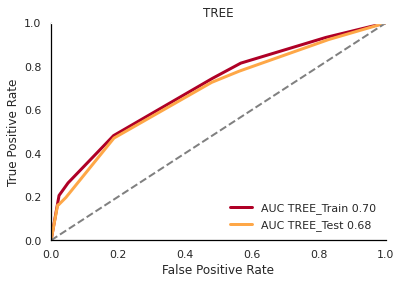

TREE CLASSIFICATION ACCURACY
------------------------------------------------
TREE_Train  =  0.8043396698349174
TREE_Test  =  0.8022005501375343



TREE AUC SCORE
------------------------------------------------
 Train:  0.7018154783157193 
 Test:  0.6819101529302457


TREE MOST IMPORTANT VARIABLES
------------------------------------------------
sale_price
AGE_SALE
DISTANCE
edu_Pct_Age_25_plus_bachelors_plus


In [ ]:
WHO = "TREE"

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", fm01_Tree, U_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores(WHO + "_Test", fm01_Tree, U_test, Y_test['Target'])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print('\n\n')
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
feature_cols = list(U_train.columns.values)
tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols,  impurity=False, class_names=["Good","Bad"])

vars_tree_flag = getTreeVars(fm01_Tree, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_tree_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = fm01_Tree.predict(U_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = fm01_Tree.predict_proba(U_train)
 
# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[12655  2905]
 [  224   208]]


ACCURACY: 0.8043396698349174
F1-SCORE: 0.11734837799717912
PRECISION: 0.06681657565049791
RECALL: 0.48148148148148145
AUC 0.7018154783157193
# PREDICTED TARGETS: 3113


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = fm01_Tree.predict(U_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = fm01_Tree.predict_proba(U_test)
 
# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3153  729]
 [  62   55]]


ACCURACY: 0.8022005501375343
F1-SCORE: 0.12208657047724748
PRECISION: 0.07015306122448979
RECALL: 0.4700854700854701
AUC 0.6819101529302457
# PREDICTED TARGETS: 784


## Random Forest - Hyperparameter Tuning

In [ ]:
# Set the Baseline Model

fm01_RF = RandomForestClassifier(random_state=1,  class_weight = weights)
fm01_RF = fm01_RF.fit(X_train, Y_train['Target'])

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("RANDOM FOREST - CLASSIFICATION\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

RANDOM FOREST - CLASSIFICATION

Probability of Default
Accuracy Train: 0.9998749374687343
Accuracy Test: 0.9707426856714179


In [ ]:
# Tune hyperparameters by passing the different parameter values 

grid_param = {'max_depth' : range(2,8,1),'n_estimators' : [1, 2, 5, 10, 20, 50, 100, 200, 500],\
              'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'random_state' : [1]}

# grid_param = {'max_depth' : range(2,8,1),'n_estimators' : [1, 2, 5, 10, 20, 50],\
#               'max_leaf_nodes': [2, 5, 10, 20 ], 'random_state' : [1]}
              
print(grid_param)


{'max_depth': range(2, 8), 'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500], 'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'random_state': [1]}


In [ ]:
# Run grid search
# 21 minutes

grid_search = GridSearchCV(estimator=fm01_RF, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(X_train, Y_train['Target'])

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 5.143503754757741e-05,
                                                            1: 0.0018214936247723133},
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 8),
                         'max_leaf_nodes': [2, 5, 10, 20, 50, 100],
                         'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500],
                         'random_state': [1]})

In [ ]:
# Display grid search best parameters to use in model refit  

best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 7, 'max_leaf_nodes': 100, 'n_estimators': 200, 'random_state': 1}


In [ ]:
# AFTER HYPERPARAMETER TUNING: Fit the model  

fm01_RF = RandomForestClassifier(max_depth = 7, max_leaf_nodes = 100, n_estimators = 200, random_state=1 ,  class_weight = weights)
fm01_RF = fm01_RF.fit( X_train, Y_train[ 'Target' ] )

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)


print("RANDOM FOREST - CLASSIFICATION\n") 
print("Accuracy Train:", metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

RANDOM FOREST - CLASSIFICATION

Accuracy Train: 0.855927963981991
Accuracy Test: 0.8402100525131283


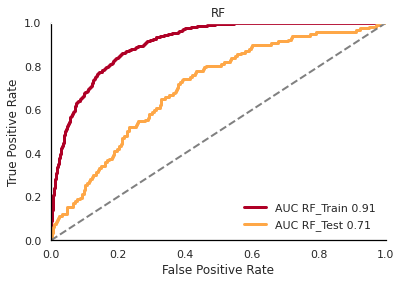

RF CLASSIFICATION ACCURACY
------------------------------------------------
RF_Train  =  0.855927963981991
RF_Test  =  0.8402100525131283


RF AUC SCORE
------------------------------------------------
 Train:  0.9062154860516043 
 Test:  0.7054122247321628


RF MOST IMPORTANT VARIABLES
------------------------------------------------
('AGE_SALE', 100)
('sale_price', 76)
('DISTANCE', 35)
('AV_BLDG_LOG', 20)
('LIVING_AREA_LOG', 20)
('AGE_BUILT', 20)
('AGE_REMODEL', 19)
('LAND_SF_LOG', 18)
('edu_Pct_Age_25_plus_bachelors_plus', 14)
('edu_Pct_Age_25_plus_associates', 13)
('R_TOTAL_RMS', 10)
('inc_pct_hh_non_fam_inc_100000_149999', 10)
('inc_pct_fam_married_couple_inc_150000_199999', 9)
('inc_pct_hh_non_fam_inc_75000_99999', 8)
('inc_pct_hh_non_fam_inc_150000_199999', 7)
('as_Pct_Age_30_to_34_years', 7)
('inc_pct_hh_non_fam_inc_lt_10000', 6)


In [ ]:

WHO = "RF"

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", fm01_RF, X_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores(WHO + "_Test", fm01_RF, X_test, Y_test['Target'])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

feature_cols = list(X_train.columns.values)

vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_RF_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = fm01_RF.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = fm01_RF.predict_proba(X_train)
 
# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[13355  2205]
 [   99   333]]


ACCURACY: 0.855927963981991
F1-SCORE: 0.22424242424242422
PRECISION: 0.13120567375886524
RECALL: 0.7708333333333334
AUC 0.9062154860516043
# PREDICTED TARGETS: 2538


### Get Performance Statistics from TEST

In [ ]:
 # Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = fm01_RF.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = fm01_RF.predict_proba(X_test)
 
# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3321  561]
 [  78   39]]


ACCURACY: 0.8402100525131283
F1-SCORE: 0.1087866108786611
PRECISION: 0.065
RECALL: 0.3333333333333333
AUC 0.7054122247321628
# PREDICTED TARGETS: 600


## Random Forest - Hyperparameter Tuning (Select Variables)

In [ ]:
# Set the Baseline Model

fm01_RF = RandomForestClassifier(random_state=1,  class_weight = weights )
fm01_RF = fm01_RF.fit(U_train, Y_train['Target'])

Y_Pred_train = fm01_RF.predict(U_train)
Y_Pred_test = fm01_RF.predict(U_test)

print("RANDOM FOREST - CLASSIFICATION\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

RANDOM FOREST - CLASSIFICATION

Probability of Default
Accuracy Train: 0.9999374687343672
Accuracy Test: 0.97024256064016


In [ ]:
# Tune hyperparameters by passing the different parameter values 

# grid_param = {'max_depth' : range(2,8,1),'n_estimators' : [1, 2, 5, 10, 20, 50, 100, 200, 500],\
#               'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'random_state' : [1]}

grid_param = {'max_depth' : range(2,8,1),'n_estimators' : [1, 2, 5, 10, 20, 50],\
              'max_leaf_nodes': [2, 5, 10, 20 ], 'random_state' : [1]}
              
print(grid_param)

{'max_depth': range(2, 8), 'n_estimators': [1, 2, 5, 10, 20, 50], 'max_leaf_nodes': [2, 5, 10, 20], 'random_state': [1]}


In [ ]:
# Run grid search
# 2 minutes

grid_search = GridSearchCV(estimator=fm01_RF, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(U_train, Y_train['Target'])

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 5.143503754757741e-05,
                                                            1: 0.0018214936247723133},
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 8),
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'n_estimators': [1, 2, 5, 10, 20, 50],
                         'random_state': [1]})

In [ ]:
# Display grid search best parameters to use in model refit  

best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 5, 'max_leaf_nodes': 20, 'n_estimators': 20, 'random_state': 1}


In [ ]:
# AFTER HYPERPARAMETER TUNING: Fit the model  

fm01_RF = RandomForestClassifier(max_depth = 5, max_leaf_nodes = 20, n_estimators = 20, random_state=1,  class_weight = weights )
fm01_RF = fm01_RF.fit( U_train, Y_train[ 'Target' ] )

Y_Pred_train = fm01_RF.predict(U_train)
Y_Pred_test = fm01_RF.predict(U_test)


print("RANDOM FOREST - CLASSIFICATION\n") 
print("Accuracy Train:", metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

RANDOM FOREST - CLASSIFICATION

Accuracy Train: 0.7971485742871436
Accuracy Test: 0.7934483620905226


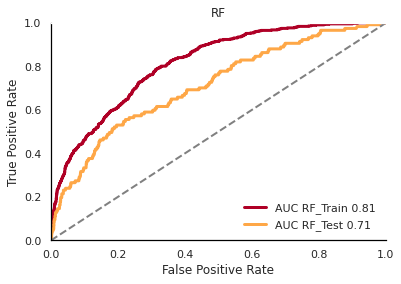

RF CLASSIFICATION ACCURACY
------------------------------------------------
RF_Train  =  0.7971485742871436
RF_Test  =  0.7934483620905226


RF AUC SCORE
------------------------------------------------
 Train:  0.8137514281633819 
 Test:  0.7118235819935974


RF MOST IMPORTANT VARIABLES
------------------------------------------------
('AGE_SALE', 100)
('sale_price', 67)
('edu_Pct_Age_25_plus_bachelors_plus', 33)


In [ ]:
WHO = "RF"

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", fm01_RF, U_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores(WHO + "_Test", fm01_RF, U_test, Y_test['Target'])

print_ROC_Curve(WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

feature_cols = list(U_train.columns.values)

vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_RF_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = fm01_RF.predict(U_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = fm01_RF.predict_proba(U_train)
 
# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[12484  3076]
 [  168   264]]


ACCURACY: 0.7971485742871436
F1-SCORE: 0.13997879109225878
PRECISION: 0.07904191616766468
RECALL: 0.6111111111111112
AUC 0.8137514281633819
# PREDICTED TARGETS: 3340


### Get Performance Statistics from TEST

In [ ]:

# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = fm01_RF.predict(U_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = fm01_RF.predict_proba(U_test)
 
# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3111  771]
 [  55   62]]


ACCURACY: 0.7934483620905226
F1-SCORE: 0.13052631578947366
PRECISION: 0.0744297719087635
RECALL: 0.5299145299145299
AUC 0.7118235819935974
# PREDICTED TARGETS: 833


## Gradient Boost - Hyperparameter Tuning

In [ ]:
# Set the Baseline Model
 
fm01_GB = GradientBoostingClassifier(random_state=1)
fm01_GB = fm01_GB.fit(X_train, Y_train['Target'])

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)


print("GRADIENT BOOSTING - CLASSIFICATION\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

GRADIENT BOOSTING - CLASSIFICATION

Probability of Default
Accuracy Train: 0.9761755877938969
Accuracy Test: 0.9684921230307577


In [ ]:
# Tune hyperparameters by passing the different parameter values 

grid_param = {'max_depth' : range(3,7,1),'n_estimators' : [1, 5, 10, 20, 100],\
              'max_leaf_nodes': [2, 5, 10, 20, 50], 'learning_rate' : [0.1, 0.2, 0.3, 0.7],\
              'random_state' : [1]}
print(grid_param)

 

{'max_depth': range(3, 7), 'n_estimators': [1, 5, 10, 20, 100], 'max_leaf_nodes': [2, 5, 10, 20, 50], 'learning_rate': [0.1, 0.2, 0.3, 0.7], 'random_state': [1]}


In [ ]:
# Run grid search 
# 60 minutes

grid_search = GridSearchCV(estimator=fm01_GB, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(X_train, Y_train['Target'])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.7],
                         'max_depth': range(3, 7),
                         'max_leaf_nodes': [2, 5, 10, 20, 50],
                         'n_estimators': [1, 5, 10, 20, 100],
                         'random_state': [1]})

In [ ]:
# Display grid search best parameters to use in model refit 

best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.1, 'max_depth': 4, 'max_leaf_nodes': 5, 'n_estimators': 5, 'random_state': 1}


In [ ]:
# AFTER HYPERPARAMETER TUNING: Fit the model  

fm01_GB = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, max_leaf_nodes = 5,\
                                     n_estimators = 5, random_state = 1)
fm01_GB = fm01_GB.fit(X_train, Y_train['Target' ])

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)


print("GRADIENT BOOSTING - CLASSIFICATION\n")
print("Accuracy Train:",metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test['Target'], Y_Pred_test))


GRADIENT BOOSTING - CLASSIFICATION

Accuracy Train: 0.9733616808404202
Accuracy Test: 0.9712428107026757


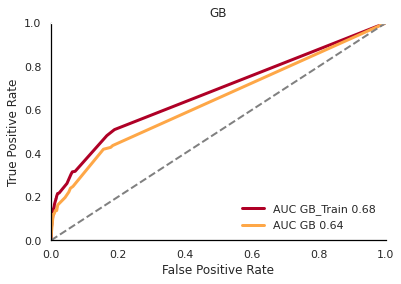

GB CLASSIFICATION ACCURACY
------------------------------------------------
GB_Train  =  0.9733616808404202
GB  =  0.9712428107026757


GB MOST IMPORTANT VARIABLES
------------------------------------------------
('AGE_SALE', 100)
('sale_price', 50)
('DISTANCE', 16)
('inc_pct_hh_non_fam_inc_25000_34999', 12)
('AGE_REMODEL', 9)
('as_Ratio_Sex_ratio_(males_per_100_females)', 5)
('R_TOTAL_RMS', 4)
('z_R_BTH_STYLE_M', 4)


In [ ]:
WHO = "GB"

TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", fm01_GB, X_train, Y_train[ 'Target'])
TEST_CLM = getProbAccuracyScores(WHO, fm01_GB, X_test, Y_test[ 'Target' ] )

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])

feature_cols = list(X_train.columns.values)

vars_GB_flag = getEnsembleTreeVars(fm01_GB, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_GB_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = fm01_GB.predict(X_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = fm01_GB.predict_proba(X_train)
 
# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[15559     1]
 [  425     7]]


ACCURACY: 0.9733616808404202
F1-SCORE: 0.031818181818181815
PRECISION: 0.875
RECALL: 0.016203703703703703
AUC 0.6775323121965153
# PREDICTED TARGETS: 8


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = fm01_GB.predict(X_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = fm01_GB.predict_proba(X_test)
 
# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3882    0]
 [ 115    2]]


ACCURACY: 0.9712428107026757
F1-SCORE: 0.033613445378151266
PRECISION: 1.0
RECALL: 0.017094017094017096
AUC 0.6393567506395945
# PREDICTED TARGETS: 2


## Gradient Boost - Hyperparameter Tuning (Select Variables)

In [ ]:
# Set the Baseline Model

fm01_GB = GradientBoostingClassifier(random_state=1)
fm01_GB = fm01_GB.fit(U_train, Y_train['Target'])

Y_Pred_train = fm01_GB.predict(U_train)
Y_Pred_test = fm01_GB.predict(U_test)


print("GRADIENT BOOSTING - CLASSIFICATION\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test['Target'], Y_Pred_test))

GRADIENT BOOSTING - CLASSIFICATION

Probability of Default
Accuracy Train: 0.9754252126063031
Accuracy Test: 0.9692423105776444


In [ ]:
# Tune hyperparameters by passing the different parameter values 

# grid_param = {'max_depth' : range(3,7,1),'n_estimators' : [1, 5, 10, 20, 100, 200],\
#               'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'learning_rate' : [0.1, 0.2, 0.3, 0.7],\
#               'random_state' : [1]}
# print(grid_param)

grid_param = {'max_depth' : range(3,7,1),'n_estimators' : [1, 5, 10, 20, 50 ],\
              'max_leaf_nodes': [2, 5, 10, 20 ], 'learning_rate' : [0.1, 0.2, 0.3, 0.7],\
              'random_state' : [1]}
print(grid_param)

{'max_depth': range(3, 7), 'n_estimators': [1, 5, 10, 20, 50], 'max_leaf_nodes': [2, 5, 10, 20], 'learning_rate': [0.1, 0.2, 0.3, 0.7], 'random_state': [1]}


In [ ]:
# Run grid search 
# 9 minutes

grid_search = GridSearchCV(estimator=fm01_GB, param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(U_train, Y_train['Target'])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.7],
                         'max_depth': range(3, 7),
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'n_estimators': [1, 5, 10, 20, 50],
                         'random_state': [1]})

In [ ]:
# Display grid search best parameters to use in model refit 

best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.1, 'max_depth': 4, 'max_leaf_nodes': 5, 'n_estimators': 5, 'random_state': 1}


In [ ]:
# AFTER HYPERPARAMETER TUNING: Fit the model  

fm01_GB = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, max_leaf_nodes = 5,\
                                     n_estimators = 5, random_state = 1)
fm01_GB = fm01_GB.fit(U_train, Y_train['Target' ])

Y_Pred_train = fm01_GB.predict(U_train)
Y_Pred_test = fm01_GB.predict(U_test)


print("GRADIENT BOOSTING - CLASSIFICATION\n")
print("Accuracy Train:",metrics.accuracy_score(Y_train['Target'], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test['Target'], Y_Pred_test))


GRADIENT BOOSTING - CLASSIFICATION

Accuracy Train: 0.9729864932466233
Accuracy Test: 0.9707426856714179


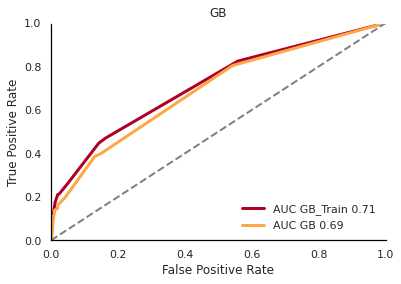

GB CLASSIFICATION ACCURACY
------------------------------------------------
GB_Train  =  0.9729864932466233
GB  =  0.9707426856714179


GB MOST IMPORTANT VARIABLES
------------------------------------------------
('AGE_SALE', 100)
('sale_price', 59)


In [ ]:
WHO = "GB"


TRAIN_CLM = getProbAccuracyScores(WHO + "_Train", fm01_GB, U_train, Y_train[ 'Target'])
TEST_CLM = getProbAccuracyScores(WHO, fm01_GB, U_test, Y_test[ 'Target' ] )

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM]) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])

feature_cols = list(U_train.columns.values)
 
vars_GB_flag = getEnsembleTreeVars(fm01_GB, feature_cols)
print("\n")
print(WHO + " MOST IMPORTANT VARIABLES\n------------------------------------------------")
for i in vars_GB_flag:
    print(i)

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = fm01_GB.predict(U_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = fm01_GB.predict_proba(U_train)
 
# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[15560     0]
 [  432     0]]


ACCURACY: 0.9729864932466233
F1-SCORE: 0.0
PRECISION: 0.0
RECALL: 0.0
AUC 0.7108681001856612
# PREDICTED TARGETS: 0


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = fm01_GB.predict(U_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = fm01_GB.predict_proba(U_test)
 
# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[3882    0]
 [ 117    0]]


ACCURACY: 0.9707426856714179
F1-SCORE: 0.0
PRECISION: 0.0
RECALL: 0.0
AUC 0.6884404021189183
# PREDICTED TARGETS: 0


## Logistic Regression (Select Variables)

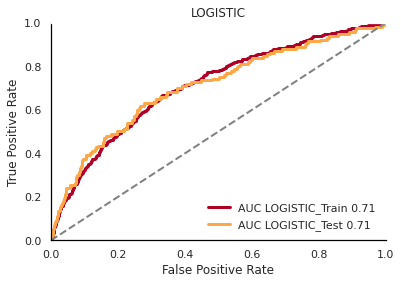

LOGISTIC CLASSIFICATION ACCURACY
------------------------------------------------
LOGISTIC_Train  =  0.6745247623811906
LOGISTIC_Test  =  0.6729182295573893


LOGISTIC AUC SCORE
------------------------------------------------
 Train:  0.7116914512520234 
 Test:  0.7084968097332858

CLASSIFICATION MODEL
------------------------------------------------
Total Variables:  11
INTERCEPT  =  -0.9666866902353912
AGE_BUILT  =  0.0035576303121643642
sale_price  =  1.3898673828520544e-06
AGE_SALE  =  -0.04184770828905203
DISTANCE  =  -0.03344053700850565
AV_BLDG_LOG  =  0.001773687703372232
LAND_SF_LOG  =  -0.005474740935100243
LIVING_AREA_LOG  =  -0.003585570800942307
AGE_REMODEL  =  0.006039873731751493
R_TOTAL_RMS  =  0.02119158534444504
edu_Pct_Age_25_plus_bachelors_plus  =  0.009228028395321108


In [ ]:
WHO = "LOGISTIC"
 
CLM = LogisticRegression(solver='newton-cg', max_iter=1000, multi_class="auto", random_state=1,  class_weight = weights)
CLM = CLM.fit( U_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores( WHO + "_Test", CLM, U_test, Y_test['Target'])

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
REG_STEP_CLM_COEF = getCoefLogit(CLM, U_train) 

REG_STEP_CLM = TEST_CLM.copy() 

Feature: 0, Score: -0.04185
Feature: 1, Score: -0.03344
Feature: 2, Score: -0.00547
Feature: 3, Score: -0.00359
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00177
Feature: 6, Score: 0.00356
Feature: 7, Score: 0.00604
Feature: 8, Score: 0.00923
Feature: 9, Score: 0.02119


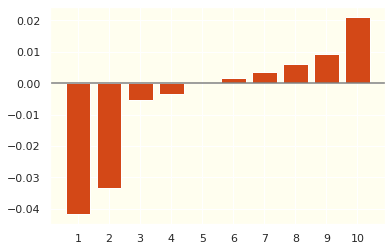

In [ ]:
from matplotlib import pyplot

importance = CLM.coef_[0]
importance=np.sort(importance)
importance

xlabnum = [x+1 for x in range(len(importance))]
xlabnum

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color='#D34817'); 
plt.xticks([x for x in range(len(importance))],xlabnum)

plt.axhline(y = 0, color = 'grey', linestyle = '-')
ax = plt.axes()
# ax.set_facecolor("#FFFABF") 
ax.set_facecolor('#FFFEEF')

pyplot.show();

### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(U_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(U_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[10506  5054]
 [  151   281]]


ACCURACY: 0.6745247623811906
F1-SCORE: 0.09745101439223167
PRECISION: 0.05267104029990628
RECALL: 0.6504629629629629
AUC 0.7116914512520234
# PREDICTED TARGETS: 5335


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(U_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(U_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[2614 1268]
 [  40   77]]


ACCURACY: 0.6729182295573893
F1-SCORE: 0.10533515731874145
PRECISION: 0.05724907063197026
RECALL: 0.6581196581196581
AUC 0.7084968097332858
# PREDICTED TARGETS: 1345


# LASSO REGRESSION

### Use LASSO on all X variables to Identify what Features it Likes

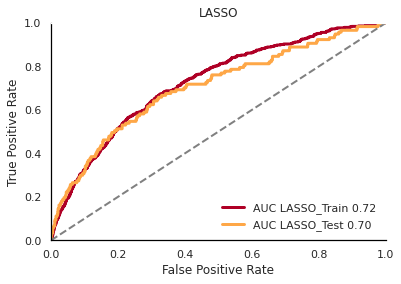

LASSO CLASSIFICATION ACCURACY
------------------------------------------------
LASSO_Train  =  0.6872186093046523
LASSO_Test  =  0.6849212303075769


LASSO AUC SCORE
------------------------------------------------
 Train:  0.7248871602161288 
 Test:  0.7035638956040811
[[2664 1218]
 [  42   75]]

CLASSIFICATION MODEL
------------------------------------------------
Total Variables:  108
INTERCEPT  =  0.0
R_TOTAL_RMS  =  0.0
inc_cnt_fam_married_couple_total  =  -0.00026032675756469323
inc_pct_fam_married_couple_inc_35000_49999  =  0.0
inc_pct_fam_married_couple_inc_50000_74999  =  -0.005423693024526026
inc_pct_fam_married_couple_inc_75000_99999  =  0.0
inc_pct_fam_married_couple_inc_100000_149999  =  0.0
inc_pct_fam_married_couple_inc_150000_199999  =  -0.00935623843266825
inc_othr_fam_married_couple_inc_median  =  9.76390676118657e-07
inc_cnt_hh_non_fam_total  =  0.000622292772902075
inc_pct_hh_non_fam_inc_lt_10000  =  0.0
inc_pct_hh_non_fam_inc_10000_14999  =  -0.002066321314556801
i

In [45]:
WHO = "LASSO"
 
CLM = LogisticRegression(solver='liblinear', max_iter=1000, multi_class="auto", random_state=1 ,  class_weight = weights, penalty='l1', C=5   )
CLM = CLM.fit( X_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores( WHO + "_Test", CLM, X_test, Y_test['Target'])

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, CLM.predict(X_test) )
print(conf_matrix )

REG_STEP_CLM_COEF = getCoefLogit(CLM, X_train) 

REG_STEP_CLM = TEST_CLM.copy() 

## Use LASSO on Select Variables

In [154]:
# These columns 'popped' most often in TREE, GB, and RF -- and LASSO

topvars = [
 'AGE_BUILT'
,'sale_price'
,'AGE_SALE'
,'DISTANCE'
,'AV_BLDG_LOG'
,'LAND_SF_LOG'
,'LIVING_AREA_LOG'
,'AGE_REMODEL'
,'R_TOTAL_RMS'
# ,'as_Pct_Age_30_to_34_years'
,'edu_Pct_Age_25_plus_bachelors_plus'
# ,'inc_pct_hh_non_fam_inc_75000_99999'
# ,'edu_Pct_Age_25_plus_lt_9th'

# ,'inc_cnt_fam_married_couple_total' 
# ,'inc_othr_fam_married_couple_inc_median' 
# ,'inc_cnt_hh_non_fam_total' 
# ,'as_Cnt_Total_Population' 
]

topvarsx = [
 'sale_price'
,'AGE_SALE'
# ,'DISTANCE'
,'AGE_REMODEL'

,'inc_cnt_fam_married_couple_total' 
,'inc_othr_fam_married_couple_inc_median' 
,'inc_cnt_hh_non_fam_total' 
,'as_Cnt_Total_Population' 
]


topvars = [
 'AGE_BUILT'  
,'sale_price'
,'AGE_SALE'  
,'AV_BLDG_LOG'
,'AGE_REMODEL'
,'edu_Pct_Age_25_plus_bachelors_plus'
]


U_train = X_train.copy() 
U_test  = X_test.copy() 
U_train = U_train[topvars]
U_test  = U_test[topvars]
U_train.shape 
U_test.shape  


(15992, 6)

(3999, 6)

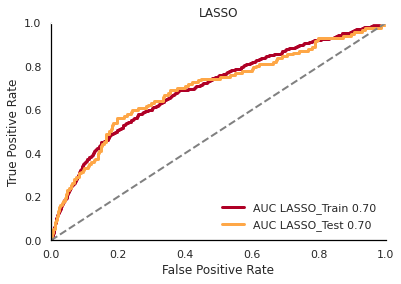

LASSO CLASSIFICATION ACCURACY
------------------------------------------------
LASSO_Train  =  0.6169334667333667
LASSO_Test  =  0.6116529132283071


LASSO AUC SCORE
------------------------------------------------
 Train:  0.7025561149195468 
 Test:  0.6997780684024888
[[2364 1518]
 [  35   82]]

CLASSIFICATION MODEL
------------------------------------------------
Total Variables:  7
INTERCEPT  =  0.0
AGE_BUILT  =  0.0
sale_price  =  1.2740974154659433e-06
AGE_SALE  =  -0.042666233073072116
AV_BLDG_LOG  =  -0.01765572775883026
AGE_REMODEL  =  0.004417819227211864
edu_Pct_Age_25_plus_bachelors_plus  =  0.0021243188290113253


In [155]:
WHO = "LASSO"
 
CLM = LogisticRegression(solver='liblinear', max_iter=1000, multi_class="auto", random_state=1 ,  class_weight = weights, penalty='l1', C=5 )
CLM = CLM.fit( U_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores( WHO + "_Test", CLM, U_test, Y_test['Target'])

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, CLM.predict(U_test) )
print(conf_matrix )

LASSO_CLM_COEF = getCoefLogit(CLM, U_train) 

LASSO_CLM = TEST_CLM.copy() 

Feature: 0, Score: -0.04267
Feature: 1, Score: -0.01766
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00212
Feature: 5, Score: 0.00442


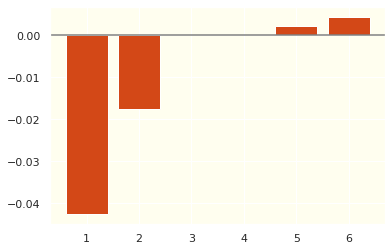

In [156]:
from matplotlib import pyplot

importance = CLM.coef_[0]
importance=np.sort(importance)
importance

xlabnum = [x+1 for x in range(len(importance))]
xlabnum

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color='#D34817'); 
plt.xticks([x for x in range(len(importance))],xlabnum)

plt.axhline(y = 0, color = 'grey', linestyle = '-')
ax = plt.axes()
# ax.set_facecolor("#FFFABF") 
ax.set_facecolor('#FFFEEF')

pyplot.show();

### Get Performance Statistics from TRAIN

In [157]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(U_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(U_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[9568 5992]
 [ 134  298]]


ACCURACY: 0.6169334667333667
F1-SCORE: 0.08866408806902708
PRECISION: 0.04737678855325914
RECALL: 0.6898148148148148
AUC 0.7025561149195468
# PREDICTED TARGETS: 6290


### Get Performance Statistics from TEST

In [158]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(U_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(U_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[2364 1518]
 [  35   82]]


ACCURACY: 0.6116529132283071
F1-SCORE: 0.0955154338963308
PRECISION: 0.05125
RECALL: 0.7008547008547008
AUC 0.6997780684024888
# PREDICTED TARGETS: 1600
